# Wind Speed Time Series

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import pickle
import time
import datetime
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
from labellines import labelLine, labelLines
%matplotlib inline

In [16]:
winddata = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1")
wind_times = winddata.time.values.astype('datetime64[s]').astype(datetime.datetime)

### Extract timeseries from dictionary pickle files

In [11]:
years = [2015,2016,2017,2018]
abbrs = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
locs = ['salmon' ,'turn', 'sog']
loc_coords = [(99, 159),(115, 149),(143, 141)]

for year in years:
    filename = "/home/abhudia/Desktop/Wind speed/y{}_data.pickle".format(str(year))
    loader = open(filename, "rb")
    wind_year = pickle.load(loader)
    locals()['salmon'] = np.array([])
    locals()['turn'] = np.array([])
    locals()['sog'] = np.array([])
    for abbr in abbrs:
        for index in range(3): 
            locals()[locs[index]] = np.append(locals()[locs[index]],wind_year[abbr + '_data'].isel(gridY = loc_coords[index][0],gridX = loc_coords[index][1]).values)
    for index in range(3):
        fname = "winds_{}{}.pickle".format(locs[index], year)
        picklefile = open(fname, 'wb')
        pickle.dump(locals()[locs[index]], picklefile)
        picklefile.close()
        locals()[locs[index]] = False

## Make Timeseries For Each Point

In [18]:
years = [2015,2016,2017,2018]
abbrs = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
locs = ['salmon' ,'turn', 'sog']
for year in [2015, 2016, 2017, 2018]:
    for loc in locs:
        fname = "winds_{}{}.pickle".format(loc, str(year))
        file = open(fname, "rb") 
        locals()["winds_{}".format(loc) + str(year)] = pickle.load(file)
        locals()["t_{}".format(loc) + str(year)] = []
        for time in wind_times: 
            if time.year == year:
                locals()["t_{}".format(loc) + str(year)].append(time)

In [29]:
labelLines(plt.gca().get_lines(),zorder=2.5)

In [40]:
f_day

[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 2, 1, 0, 0),
 datetime.datetime(2015, 3, 1, 0, 0),
 datetime.datetime(2015, 4, 1, 0, 0),
 datetime.datetime(2015, 5, 1, 0, 0),
 datetime.datetime(2015, 6, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 8, 1, 0, 0),
 datetime.datetime(2015, 9, 1, 0, 0),
 datetime.datetime(2015, 10, 1, 0, 0),
 datetime.datetime(2015, 11, 1, 0, 0),
 datetime.datetime(2015, 12, 1, 0, 0)]

# Make Plots

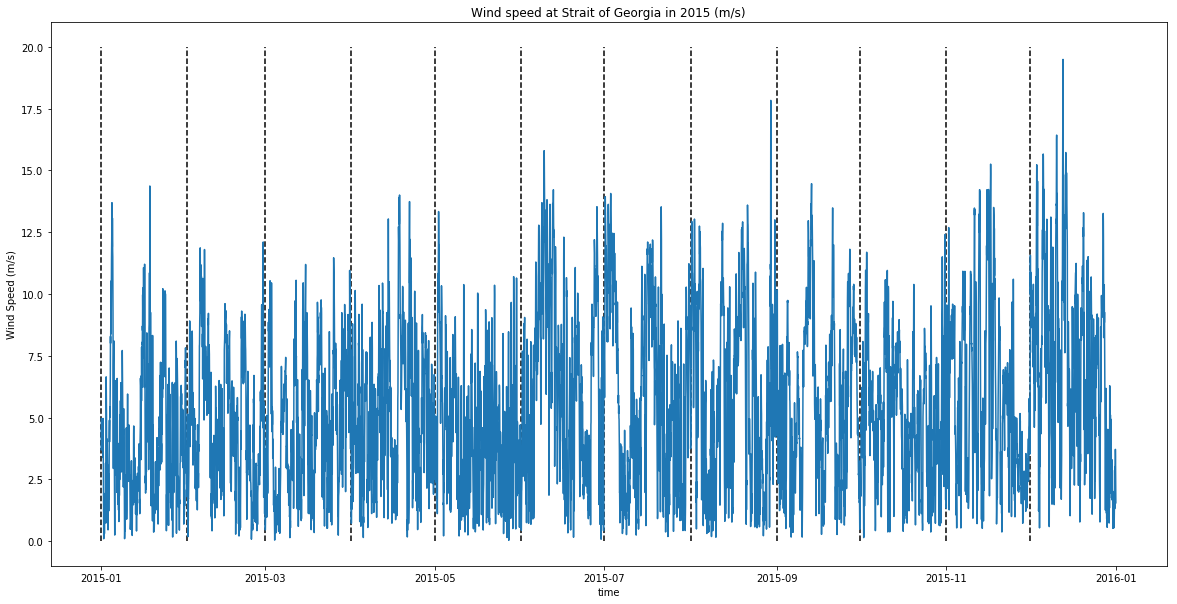

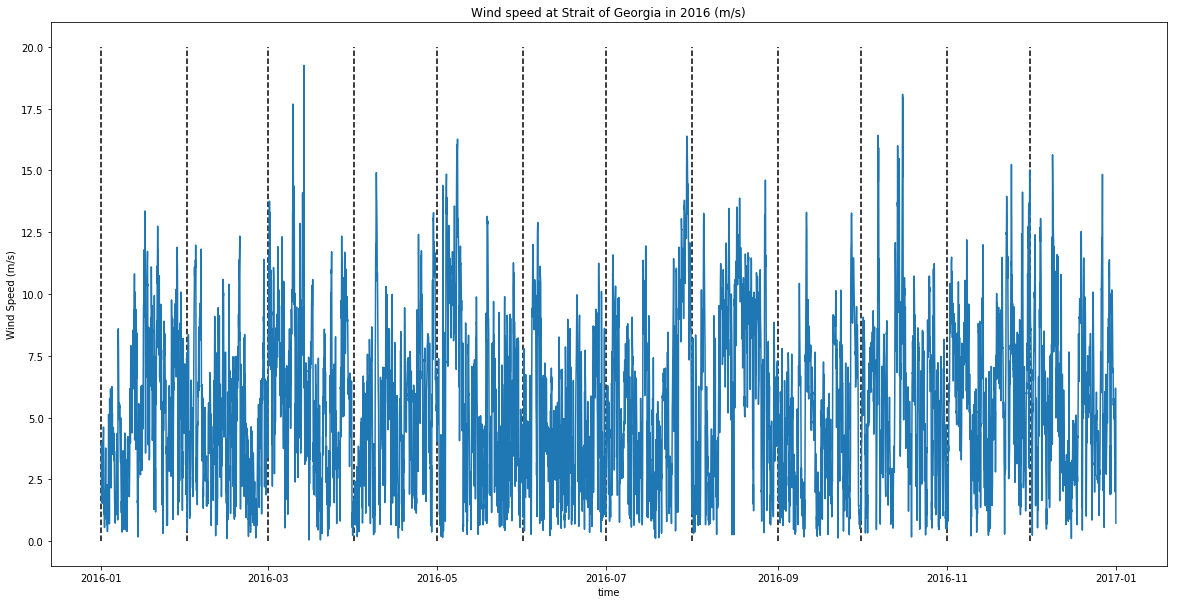

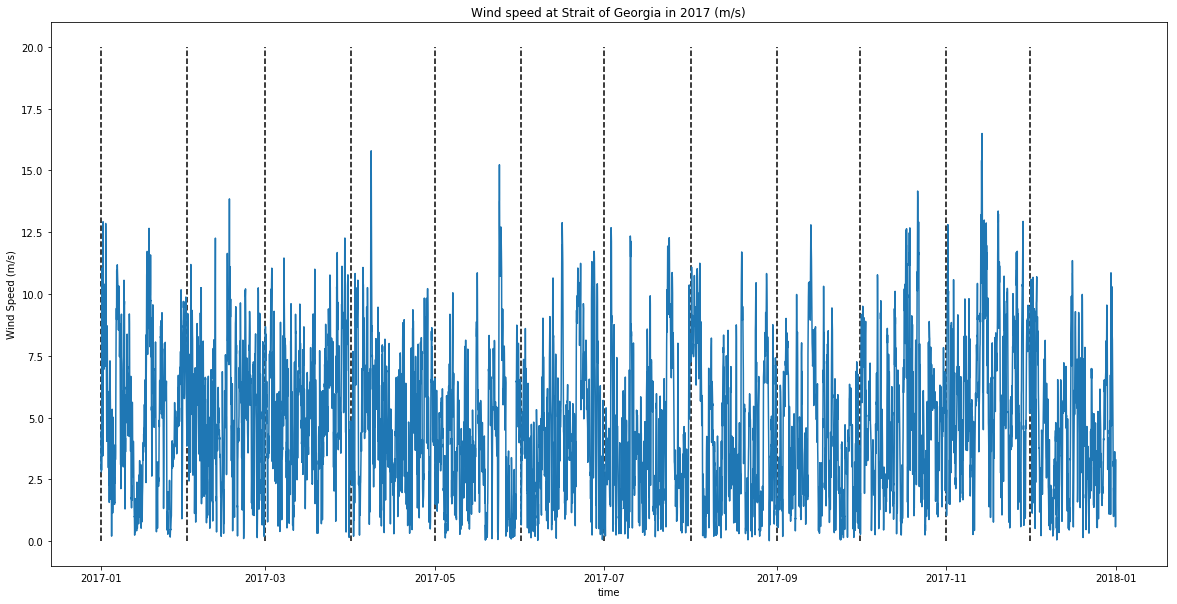

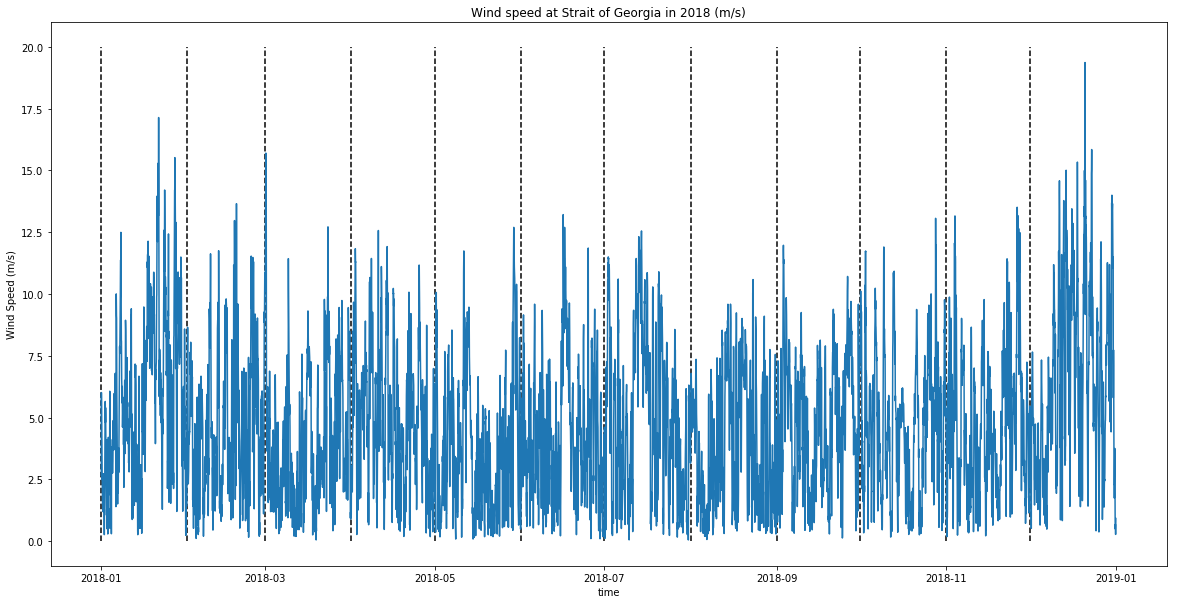

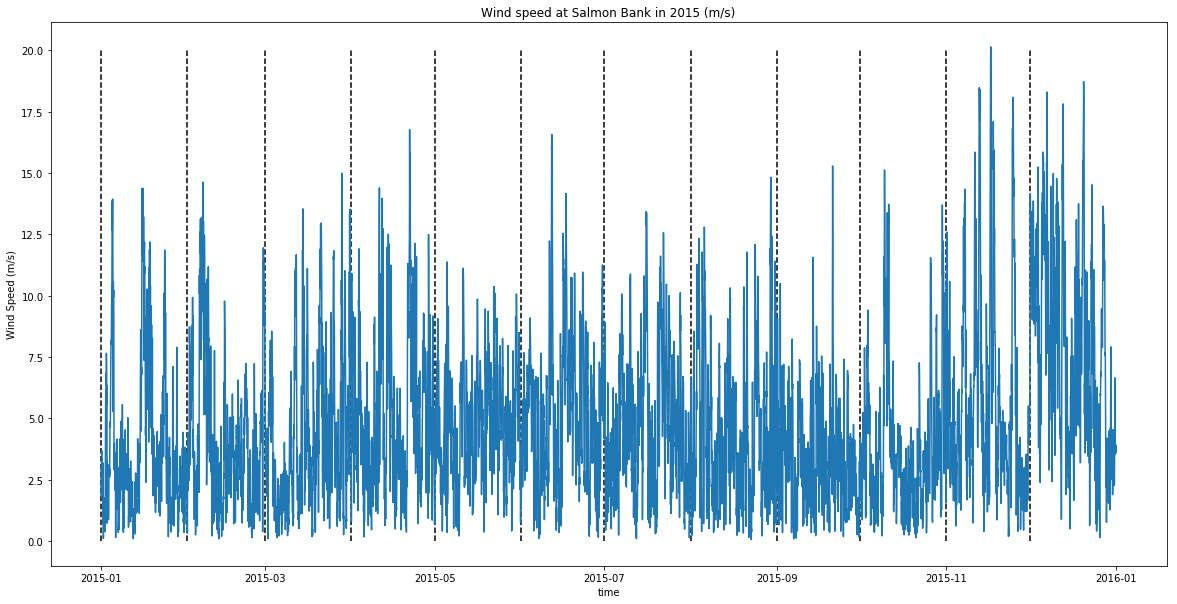

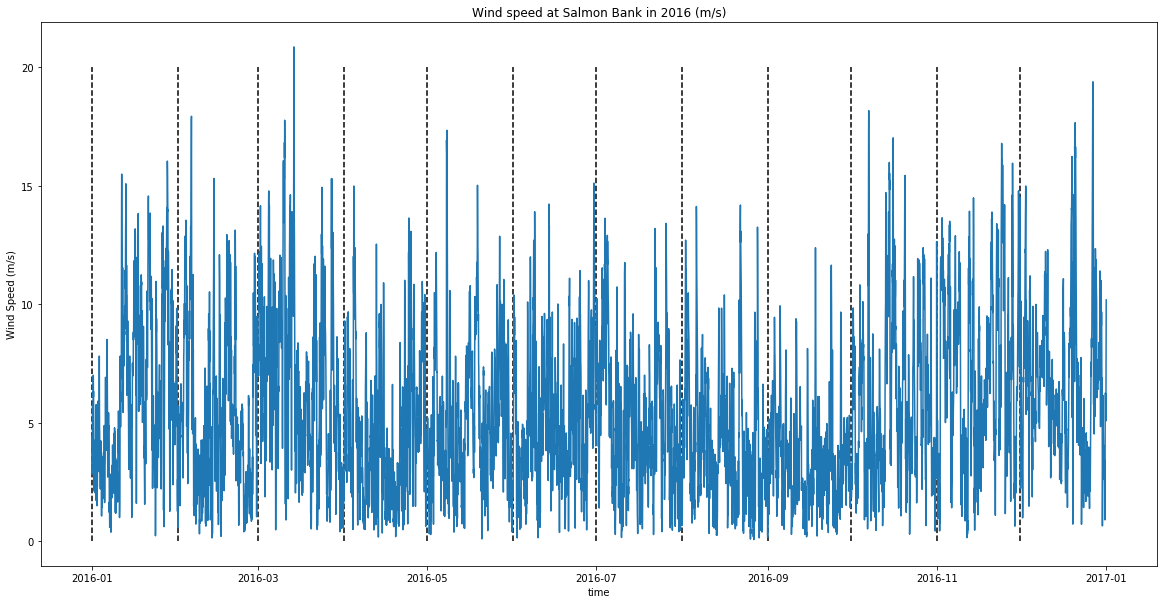

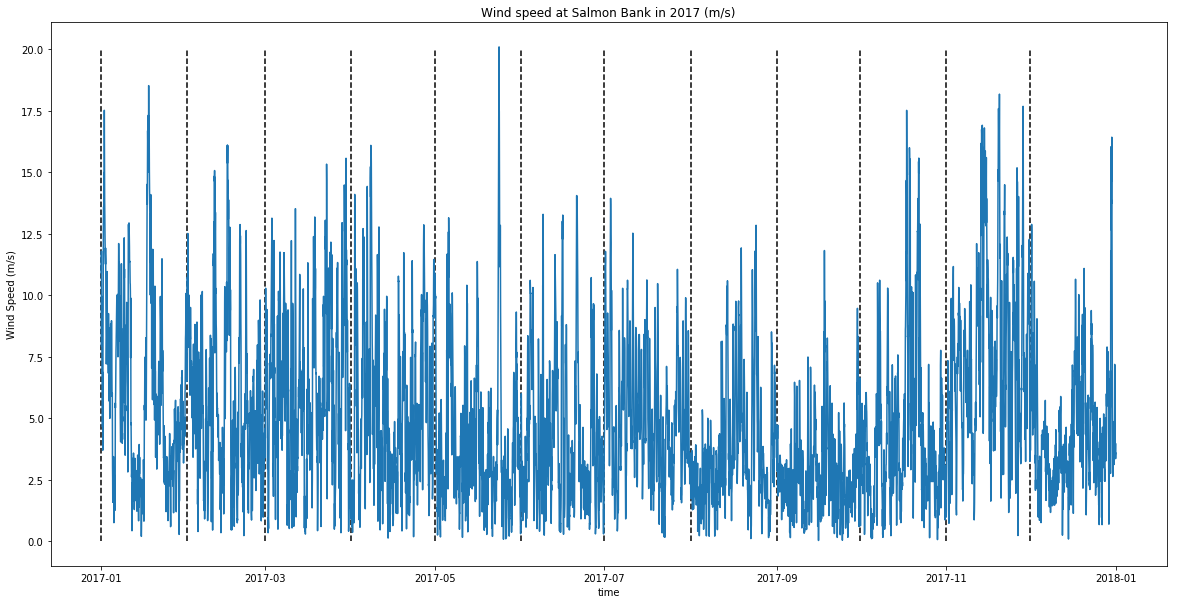

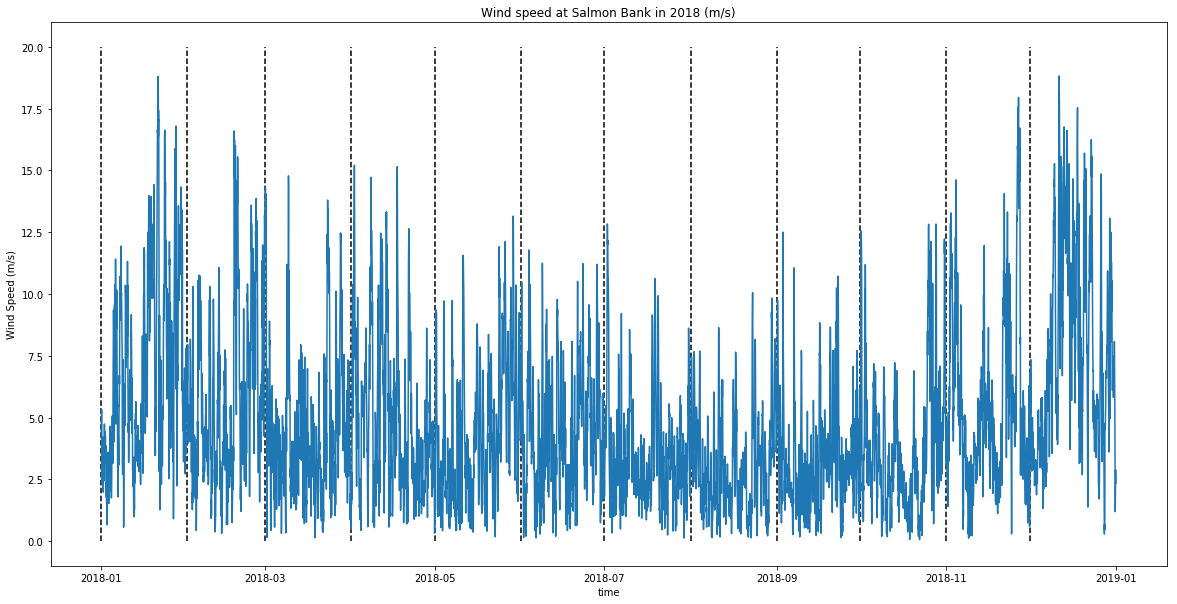

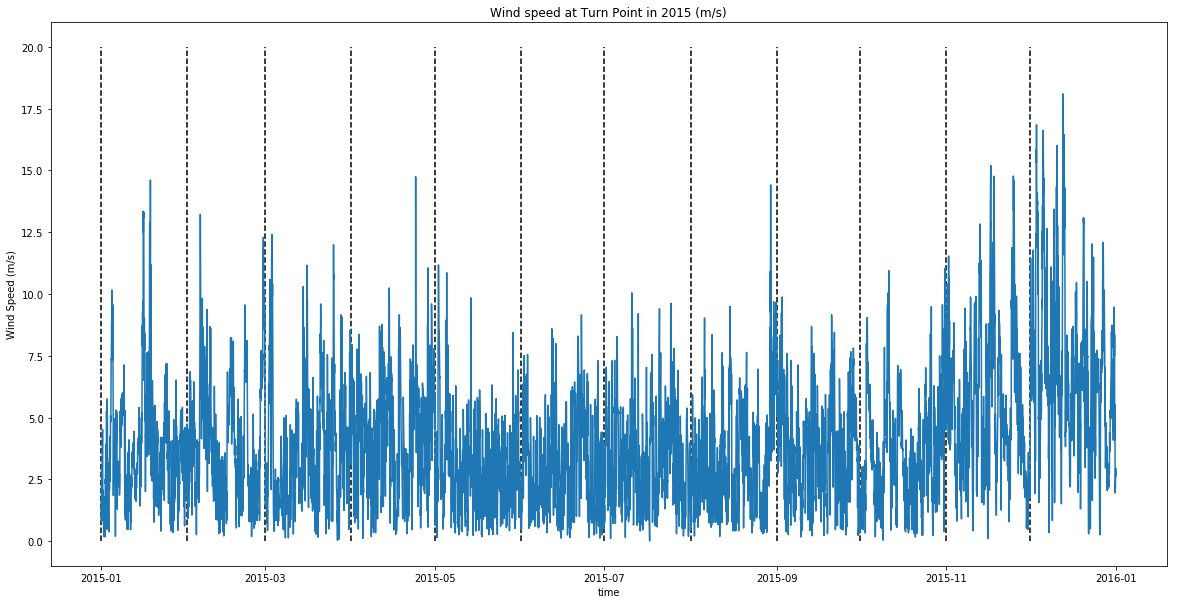

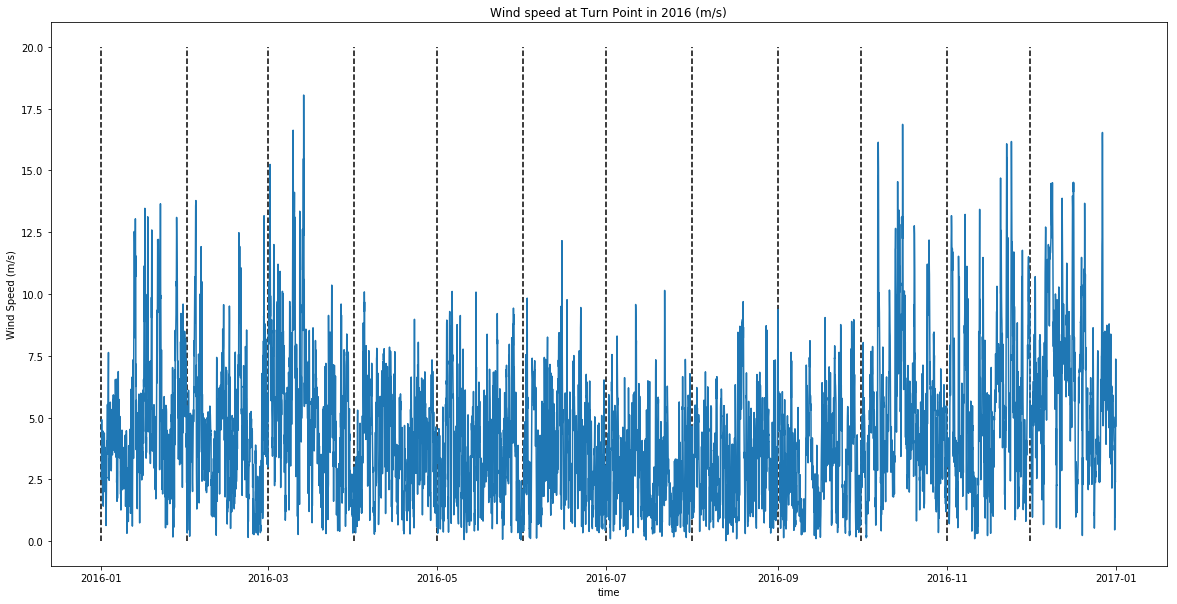

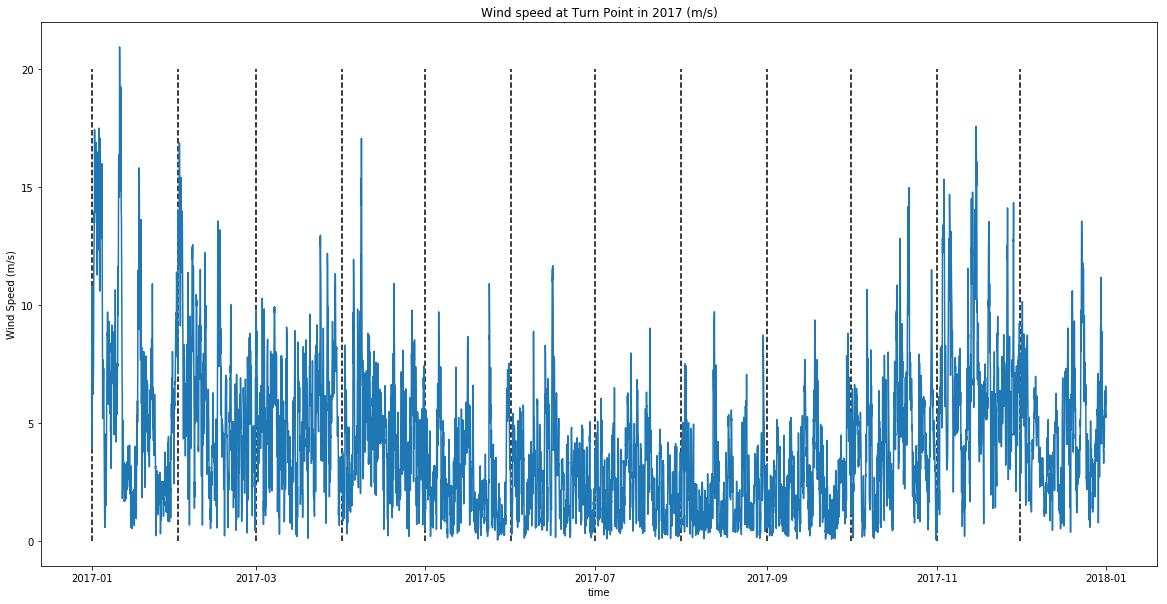

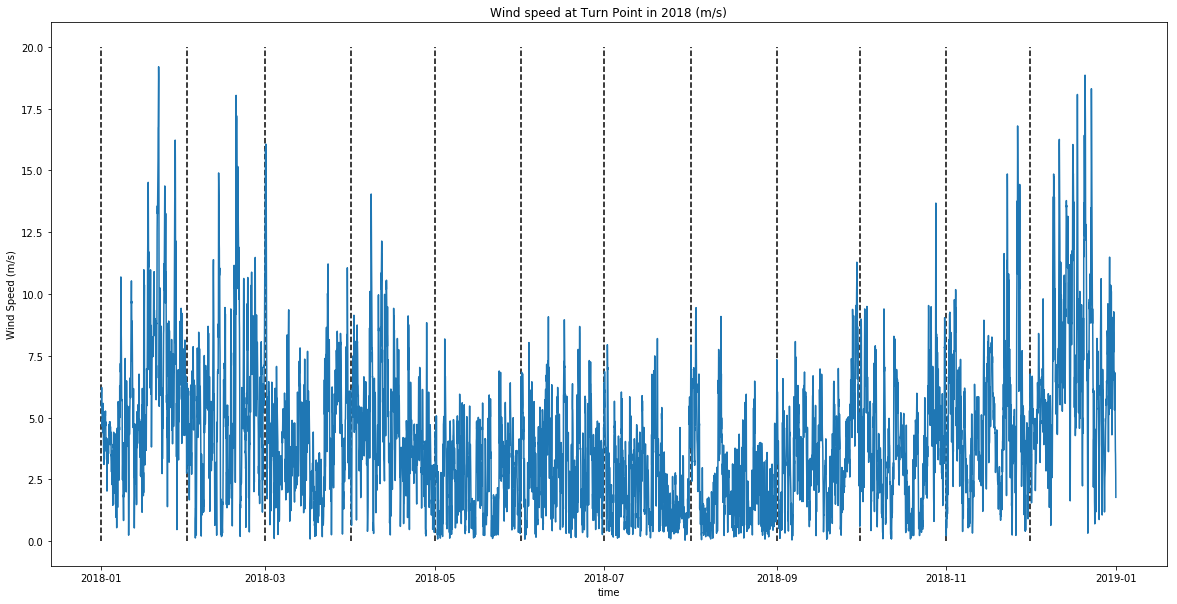

In [58]:
locs = ['sog', 'salmon', 'turn']
locations = ['Strait of Georgia', 'Salmon Bank', 'Turn Point']
years = [2015,2016,2017,2018]
for index in range(3):
    for year in years: 
        wind_array = "winds_{}{}".format(locs[index], str(year))
        times = "t_{}{}".format(locs[index], str(year))
        fig = plt.figure(figsize=(20,10))
        plt.plot(locals()[times], locals()[wind_array])
        for month in range(1,13):
            plt.vlines(datetime.datetime(year, month, 1, 0, 0 ,0), 0, 20, linestyles = 'dashed')
        plt.xlabel('time')
        plt.ylabel('Wind Speed (m/s)')
        title = 'Wind speed at {} in {} (m/s)'.format(locations[index], year)
        plt.title(title)